In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

In [2]:
img_path = 'data/city_3_0_9.png'

## Use of Tensorflow 

In [3]:
# Load a png
img_png = image.load_img(img_path)
# Transform to a Numpy array array - 1
img_array = tf.keras.preprocessing.image.img_to_array(img_png, dtype='uint8')
# Transform to a Numpy array array - 2
img_np_array = np.asarray(img_array, dtype=np.float32)
# Transform to tf.Tensor
img_tensor = tf.convert_to_tensor(img_array, dtype='uint8')

#Tensor to numpy 
# tensor.numpy()

# plt.imshow() - works with all formats

In [4]:
img_np_array

array([[[103., 105.,  84.],
        [102., 104.,  83.],
        [105., 109.,  87.],
        ...,
        [ 60.,  76.,  60.],
        [ 61.,  76.,  62.],
        [ 58.,  74.,  60.]],

       [[ 95.,  96.,  75.],
        [ 93.,  94.,  74.],
        [100., 104.,  83.],
        ...,
        [ 60.,  76.,  60.],
        [ 60.,  76.,  62.],
        [ 59.,  75.,  61.]],

       [[ 89.,  91.,  71.],
        [ 89.,  91.,  71.],
        [ 93.,  95.,  76.],
        ...,
        [ 62.,  77.,  62.],
        [ 56.,  72.,  58.],
        [ 58.,  74.,  60.]],

       ...,

       [[ 69.,  91.,  92.],
        [ 68.,  90.,  91.],
        [ 70.,  92.,  93.],
        ...,
        [114., 115., 102.],
        [115., 114., 102.],
        [113., 114., 101.]],

       [[ 69.,  91.,  90.],
        [ 70.,  92.,  90.],
        [ 70.,  91.,  90.],
        ...,
        [114., 114., 102.],
        [115., 116., 103.],
        [113., 114., 101.]],

       [[ 70.,  93.,  91.],
        [ 70.,  92.,  91.],
        [ 68.,  

## Open with PIL

In [3]:
import numpy as np
from PIL import Image

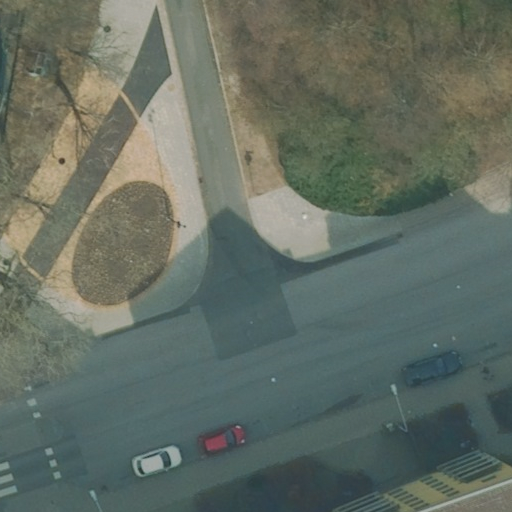

In [6]:
Image.open(img_path)

In [7]:
img_np_array = np.array(Image.open(img_path))

img_np_array

# Preprocessing

In [44]:
from glob import glob
import functools
import os

In [67]:
# Key Variables
image_size = [256, 256]

# Convert Images and Masks to TFRecords for Segmentation

In [61]:
# Define constants:
dir_train = r'D:\GATE\07_Projects\03_rooftop_segmentation\data\train'
dir_valid = r'D:\GATE\07_Projects\03_rooftop_segmentation\data\valid'
subdir_images = 'images_jpeg'
subdir_labels = 'masks_jpeg'
image_files_ext = '.jpeg'
label_files_ext = '.jpeg'

In [78]:
# Define paths variables and image lists

# TFRecords directories
tfrecords_dir_train = os.path.join(dir_train, 'tfrecords') 
tfrecords_dir_valid = os.path.join(dir_valid, 'tfrecords') 

# Image/ Labels paths
dir_train_images = os.path.join(dir_train, subdir_images)
dir_train_labels = os.path.join(dir_train, subdir_labels)

dir_valid_images = os.path.join(dir_valid, subdir_images)
dir_valid_labels = os.path.join(dir_valid, subdir_labels)

train_image_files = glob(dir_train_images + '\*' + image_files_ext)
train_label_files = glob(dir_train_labels + '\*' + label_files_ext)

valid_image_files = glob(dir_valid_images + '\*' + image_files_ext)
valid_label_files = glob(dir_valid_labels + '\*' + label_files_ext)

In [63]:
# Check whether images and masks are the same number
def get_image_mask_pair(list_image_files, list_mask_files):
    assert(len(list_image_files) == len(list_mask_files))
    return sorted(list_image_files), sorted(list_mask_files)

train_image_files = glob(dir_train_images + '\*' + image_files_ext)
train_label_files = glob(dir_train_labels + '\*' + label_files_ext)

train_image_files, train_label_files =  get_image_mask_pair(train_image_files, train_label_files)
print(len(train_image_files))

443


In [79]:
valid_image_files

['D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_0_10.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_0_11.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_0_9.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_0.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_1.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_10.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_2.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_3.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_4.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\valid\\images_jpeg\\city_3_10_5.jpeg',
 'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\

In [65]:
# Create output folders for the TFRecords

num_samples = 128

num_tfrecords = len(valid_image_files) // num_samples
if len(valid_image_files) % num_samples:
    num_tfrecords += 1  # add one record if there are any remaining samples
    
print(num_tfrecords)
# if not os.path.exists(tfrecords_dir_train):
#     os.makedirs(tfrecords_dir_train)  # creating TFRecords output folder

0


### Define TFRecords helper functions

In [52]:
def image_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(
        bytes_list=tf.train.BytesList(value=[tf.io.encode_jpeg(value).numpy()])
    )

# This is for other type of input such as class labels
def bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))


def create_example(image, mask, image_path):
    feature = {
        "image": image_feature(image),
        "mask": image_feature(mask),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

### Create TFRecords Files

In [54]:
# Define the number of samples in a TFRecord file
num_samples = 128

In [58]:
def create_tf_files(image_files, label_files, tfrecords_dir, num_samples=num_samples):
    
    num_tfrecords = len(image_files) // num_samples
    if len(image_files) % num_samples:
        num_tfrecords += 1  # add one record if there are any remaining samples
    
    for tfrec_num in range(num_tfrecords):
        samples = zip(image_files[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)],
            label_files[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)])

        samples_count = len(image_files[(tfrec_num * num_samples) : ((tfrec_num + 1) * num_samples)])
        print(samples_count)

        with tf.io.TFRecordWriter(
            tfrecords_dir + "/file_%.2i-%i.tfrec" % (tfrec_num, samples_count)
        ) as writer:
            for image_path, mask_path in samples:
                image_path = image_path
                mask_path = mask_path
                image = tf.io.decode_jpeg(tf.io.read_file(image_path))
                mask = tf.io.decode_jpeg(tf.io.read_file(mask_path))
                example = create_example(image, mask, image_path)
                writer.write(example.SerializeToString())

In [59]:
if not os.path.exists(tfrecords_dir_valid):
    os.makedirs(tfrecords_dir_valid)  # creating TFRecords output folder

In [80]:
create_tf_files(valid_image_files, valid_label_files, tfrecords_dir_valid)

128
25


## Use the TFRecords with tf.data.Dataset

In [88]:
batch_size = 4
image_size = [256, 256]

In [97]:
def parse_tfrecord(example, resize_to=[256, 256]):
    feature_description = {
            'image': tf.io.FixedLenFeature([], tf.string),
            'mask': tf.io.FixedLenFeature([], tf.string),
    }
    
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.io.decode_jpeg(example["image"], channels=3)
    example["mask"] = tf.io.decode_jpeg(example["mask"], channels=1)
    
    # We can embed some transformation here:
    
    # Converting image to float:
    example["image"] = tf.image.convert_image_dtype(example["image"], tf.float32)
    example["mask"] = tf.cast(example["mask"], tf.float32) / 255.0
    
    # Resizing:
    example["image"] = tf.image.resize(example["image"], resize_to)
    example["mask"] = tf.image.resize(example["mask"], resize_to, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    return example

In [98]:
valid_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir_valid}/file_00-{num_samples}.tfrec", num_parallel_reads=tf.data.experimental.AUTOTUNE)
valid_dataset = raw_dataset.map(parse_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
# we can apply another transformation with .map
# we can use also use the structure function_to_apply = functools.partial(original_function, parameters)
# valid_dataset.shuffle()
valid_dataset.batch(batch_size)
# valid_dataset.prefetch(tf.data.experimental.AUTOTUNE)

<BatchDataset shapes: {image: (None, 256, 256, 3), mask: (None, 256, 256, 1)}, types: {image: tf.float32, mask: tf.float32}>

(256, 256, 3)


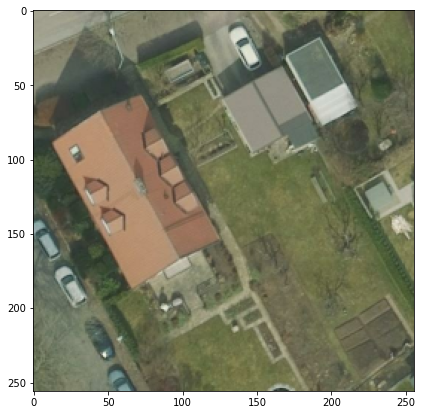

In [100]:
for features in valid_dataset.take(1):
    print(features['image'].shape)
    plt.figure(figsize=(7, 7))
    plt.imshow(features["image"].numpy())
    plt.show()

### Adding Augmentation function

In [101]:
@tf.function
def augmentation_function(example, 
                          crop_min_factor=None, flip_left_right=True, flip_up_down=False,
                          brightness_max_delta=0.15, saturation_max_delta=0.5):
    
    image = features["image"]
    gt_image = features["mask"]
    
    # If we decide to randomly flip or resize/crop the image, the same should be applied to
    # the label one so they still match. Therefore, to simplify the procedure, we stack the
    # two images together along the channel axis, before these random operations:
    do_geometrical_transform = crop_min_factor is not None or flip_left_right or flip_up_down
    if do_geometrical_transform:
        num_image_channels = tf.shape(image)[-1]
        num_gt_channels = tf.shape(gt_image)[-1]
        stacked_images = tf.concat([image, tf.cast(gt_image, dtype=image.dtype)], axis=-1)
        
        # Randomly applied flip:
        if flip_left_right:
            stacked_images = tf.image.random_flip_left_right(stacked_images)
        if flip_up_down:
            stacked_images = tf.image.random_flip_up_down(stacked_images)
    
        # Random cropping:
        if crop_min_factor is not None:
            original_shape = tf.shape(stacked_images)[-3:-1]
            random_scale_factor = tf.random.uniform(
                [], minval=crop_min_factor, maxval=1., dtype=tf.float32)
            crop_shape = tf.cast(tf.cast(original_shape, tf.float32) * random_scale_factor, 
                                 tf.int32)
            if len(stacked_images.shape) == 3: # single image:
                crop_shape = tf.concat(
                    [crop_shape, [num_image_channels + num_gt_channels]], axis=0)
            else:                              # batched images:
                batch_size = tf.shape(stacked_images)[0]
                crop_shape = tf.concat(
                    [[batch_size], crop_shape, [num_image_channels + num_gt_channels]], axis=0)
            stacked_images = tf.image.random_crop(stacked_images, crop_shape)
            
        # The remaining transformations should be applied either differently to the input and GT images
        # (nearest-neighbor resizing for the label image VS interpolated resizing for the image),
        # or only to the input image, not the GT one (color changes, etc.). Therefore, we split them back:
        image = stacked_images[..., :num_image_channels]
        gt_image = tf.cast(stacked_images[..., num_image_channels:], dtype=gt_image.dtype)        
        

    # Random B/S changes:
    need_clipping = False
    if brightness_max_delta is not None:
        image = tf.image.random_brightness(image, max_delta=brightness_max_delta)
        need_clipping = True
    if saturation_max_delta is not None:
        image = tf.image.random_saturation(
            image, lower=1 - saturation_max_delta, upper=1 + saturation_max_delta)
        need_clipping = True
    if need_clipping:
        # Because of the random B/S changes, some pixel values may not be in [0, 1] anymore
        # so we clip them properly.
        image = tf.clip_by_value(image, 0.0, 1.0)
        
    # Note: It dosnt matter here, wether the function return example or other variables
    return image, gt_image

In [149]:
train_dataset = tf.data.TFRecordDataset(f"{tfrecords_dir_train}/file_00-{num_samples}.tfrec", num_parallel_reads=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.map(parse_tfrecord, num_parallel_calls=tf.data.experimental.AUTOTUNE)
aug_fn = functools.partial(augmentation_function, saturation_max_delta=.9, brightness_max_delta=.9)

augmented_dataset = train_dataset.map(aug_fn)
augmented_dataset = augmented_dataset.cache()
augmented_dataset = augmented_dataset.shuffle(500)
augmented_dataset =  augmented_dataset.batch(4)
augmented_dataset =  augmented_dataset.prefetch(tf.data.experimental.AUTOTUNE)


(4, 256, 256, 3)


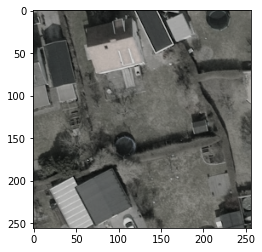

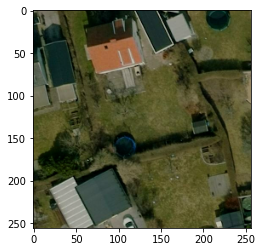

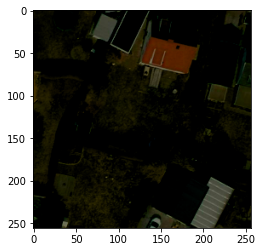

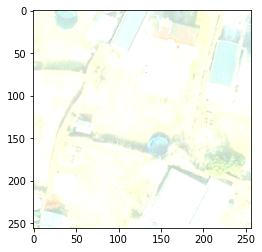

In [155]:
for image_batch, mask_batch in augmented_dataset.take(1):
    print(image_batch.shape)
    for img in range(image_batch.shape[0]):
        simgle_image = image_batch[img,:,:,:]
        plt.imshow(simgle_image.numpy())
        plt.show()

# PNG to tf.Dataset

In [36]:
# List the paths to train and vaild folder:
train_paht = r'D:\GATE\07_Projects\03_rooftop_segmentation\data\train'
valid_paht = r'D:\GATE\07_Projects\03_rooftop_segmentation\data\valid'

# image files
image_files = glob(train_paht + '/images/*.png')
# mask files
mask_files = glob(train_paht + '/masks/*.png')

In [39]:
# # Just to assure number images is the same as masks
# def get_image_mask_pair(list_image_files, list_mask_files):
#     assert(len(list_image_files) == len(list_mask_files))
#     return sorted(list_image_files), sorted(list_mask_files)

# num_training_files = len(image_files)
# num_validation_files = len(image_files)

# train_input_files, train_gt_files = get_image_mask_pair(image_files, mask_files)

In [51]:
image_files = tf.constant([train_input_files[:]])
gt_files = tf.constant([train_gt_files[:]])

type(image_files)
print(image_files.shape)
"This is a Tensor of a list containing the images "

(1, 443)


'This is a Tensor of a list containing the images '

In [61]:
# From the list we create a dataset
dataset_file = tf.data.Dataset.from_tensor_slices({'image': tf.squeeze(image_files), 
                                                   'label': tf.squeeze(gt_files)})
print(type(dataset_file))
print("This is a dataset - dict 'image'/'label' as keys and paths to the files as values ")

for i in dataset_file.take(1):
    print()
    print(i)

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>
This is a dataset - dict 'image'/'label' as keys and paths to the files as values 

{'image': <tf.Tensor: shape=(), dtype=string, numpy=b'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\train/images\\city_1_0_4.png'>, 'label': <tf.Tensor: shape=(), dtype=string, numpy=b'D:\\GATE\\07_Projects\\03_rooftop_segmentation\\data\\train/masks\\city_1_0_4.png'>}


**The purpose of converting the files into a dict is to be able to map a function to it**

In [63]:
# Read from the datasetfile
# turn to float
# scale and resize
# return Tensors

def parse_function(filenames, resize_to=[226, 226]):
    """
    Parse files into input/label image pair.
    :param filenames:   Dict containing the two files (filenames['image'], filenames['label'])
    :param resize_to:   H x W Dimensions to resize the image and label to
    :return:            Input tensor, Label tensor
    """
    img_filename, gt_filename = filenames['image'], filenames['label']

    # Reading the files and returning their content as bytes:
    image_string, gt_string = tf.io.read_file(img_filename), tf.io.read_file(gt_filename)
    # Decoding those into images
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)
    gt_decoded = tf.io.decode_png(gt_string, channels=1)
    
    # Converting image to float:
    image = tf.image.convert_image_dtype(image_decoded, tf.float32)
    gt = tf.cast(gt_decoded, tf.float32) / 255.0
                                  
    # Resizing:
    image = tf.image.resize(image, resize_to)
    gt = tf.image.resize(gt, resize_to, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    return image, gt

In [148]:
parse_fn = functools.partial(parse_function, resize_to=image_size)
dataset_image = dataset_file.map(parse_fn)

In [150]:
type(dataset_image)

tensorflow.python.data.ops.dataset_ops.MapDataset

**Augmentation/ Caching / shuffling/ batching/ prefetching**

In [70]:
# Caching / shuffling/ batching/ prefetching/ augmentation

# aug_fn = functools.partial(augmentation_function, crop_min_factor=1, flip_left_right=True, flip_up_down=True,
#                           brightness_max_delta=.2, saturation_max_delta=.5)
# dataset_aug = dataset_image.map(aug_fn)

# dataset_aug = dataset_aug.cache()
# dataset_aug = dataset_aug.shuffle(buffer_size=500)
# dataset_aug = dataset_aug.batch(batch_size)
# train_dataset = dataset_aug.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

# print(train_dataset)

# PNG TO JPEG

In [68]:
from PIL import Image
import os

In [69]:
cd "D:\GATE\07_Projects\03_rooftop_segmentation\data\valid"

D:\GATE\07_Projects\03_rooftop_segmentation\data\valid


In [74]:
path_origin = 'images_png'
path_jpeg = 'images_jpeg'

In [75]:
# %%bash
!mkdir images_jpeg

In [76]:
for image_path in os.listdir(path_origin):
    
    with Image.open(os.path.join(path_origin, image_path)) as image:
#         image = Image.open(image_path)
        rgb_image = image.convert('RGB')
        rgb_image.save(os.path.join(path_jpeg, image_path.split(".")[0] + ".jpeg"))